### Sleep Health and Lifestyle Dataset

#### Dataset Overview:
#### The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

#### Key Features of the Dataset:
#### Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
#### Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
#### Cardiovascular Health: Examine blood pressure and heart rate measurements.
#### Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sqlalchemy import create_engine
warnings.filterwarnings('ignore')

## The Data 

In [2]:
sleep_data=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Hackaton/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Exploratory Data Analysis

### Show the data

In [4]:
sleep_data.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


#### Missing values

In [5]:
sleep_data.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
sleep_data.isnull().sum()*100/sleep_data.isnull().count()

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

#### There is no missing values, let's plot the distribution of the predicted variables

In [7]:
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


(array([219.,   0.,   0.,   0.,   0.,  78.,   0.,   0.,   0.,  77.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

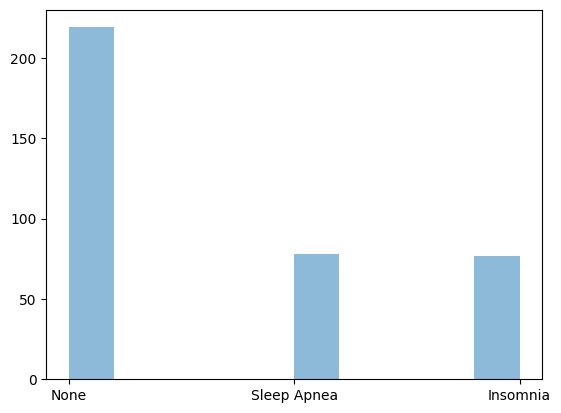

In [8]:
plt.hist(sleep_data["Sleep Disorder"], alpha=.5)

### Some Data visualization

In [9]:
### How many professional jobs do we have in the data

In [10]:
sleep_data['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

## NB: We have to focus on sleep disorder, because it is our target variable

### Bivariate visualization of continuous and categorical variables

Text(0.5, 1.0, 'Sleep disorder vs Age')

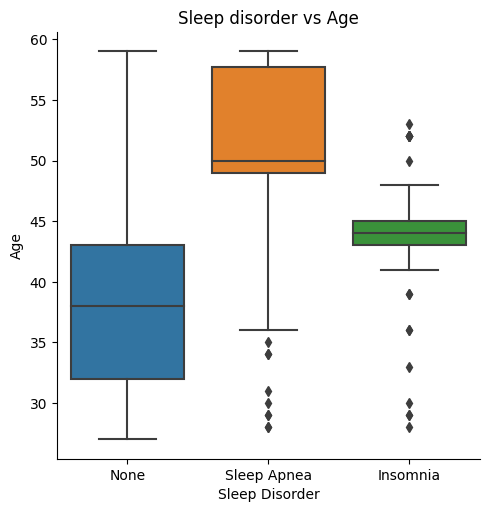

In [11]:
sns.catplot(sleep_data, x="Sleep Disorder", y="Age", kind="box")
plt.title('Sleep disorder vs Age')

Text(0.5, 1.0, 'Sleep disorder vs sleep duration')

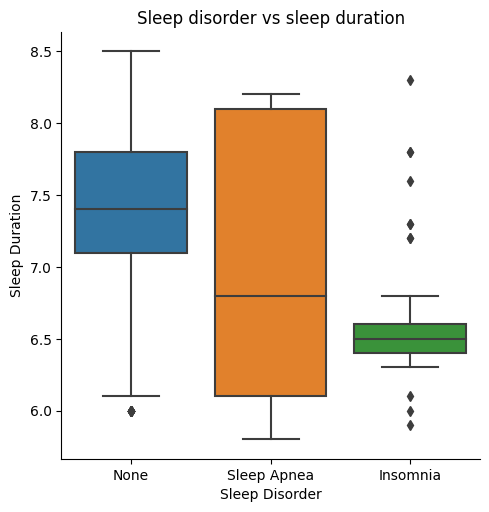

In [12]:
sns.catplot(sleep_data, x="Sleep Disorder", y="Sleep Duration", kind="box")
plt.title('Sleep disorder vs sleep duration')

Text(0.5, 1.0, 'Slepp disorder vs quality of sleep')

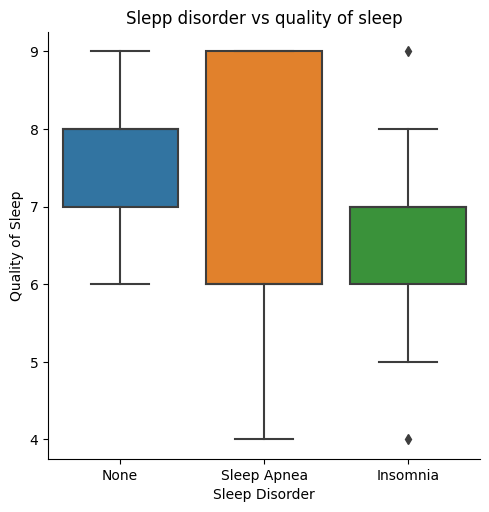

In [13]:
sns.catplot(sleep_data, x="Sleep Disorder", y="Quality of Sleep", kind="box")
plt.title('Slepp disorder vs quality of sleep')

Text(0.5, 1.0, 'Slepp disorder vs Physical Activity Level')

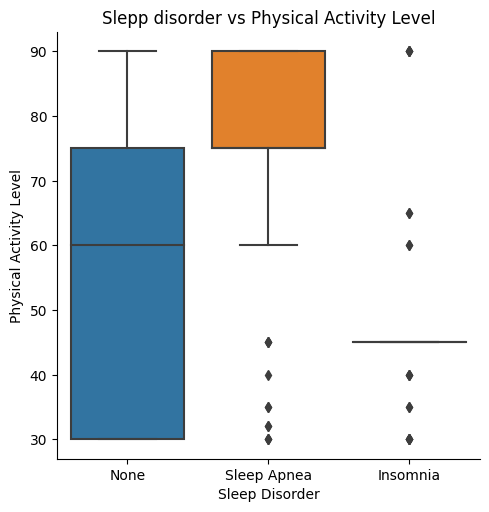

In [14]:
sns.catplot(sleep_data, x="Sleep Disorder", y="Physical Activity Level", kind="box")
plt.title('Slepp disorder vs Physical Activity Level')

Text(0.5, 1.0, 'Slepp disorder vs Stress level')

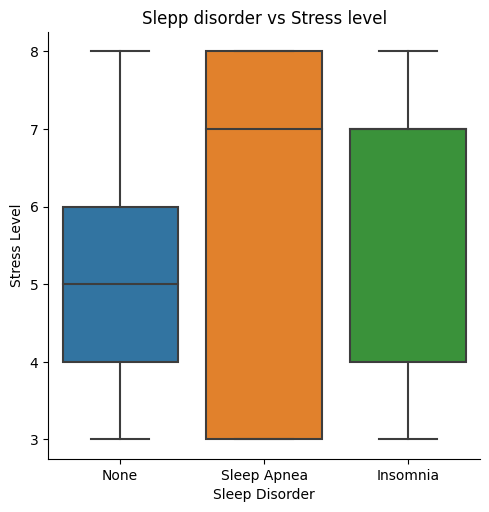

In [15]:
sns.catplot(sleep_data, x="Sleep Disorder", y="Stress Level", kind="box")
plt.title('Slepp disorder vs Stress level')

Text(0.5, 1.0, 'Slepp disorder vs Heart rate')

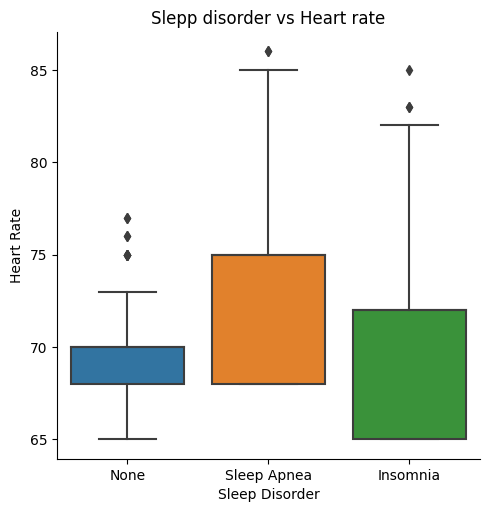

In [16]:
sns.catplot(sleep_data, x="Sleep Disorder", y="Heart Rate", kind="box")
plt.title('Slepp disorder vs Heart rate')

Text(0.5, 1.0, 'Slepp disorder vs Daily steps')

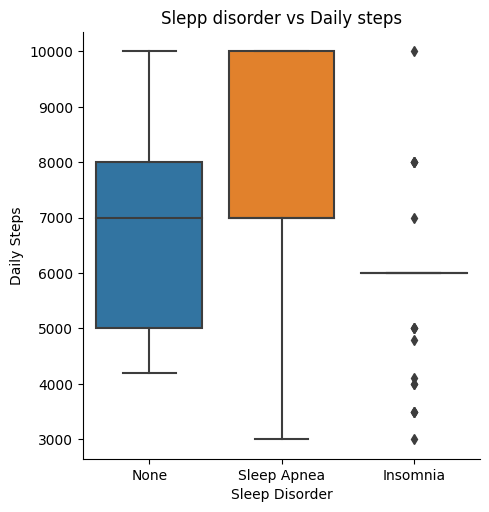

In [17]:
sns.catplot(sleep_data, x="Sleep Disorder", y="Daily Steps", kind="box")
plt.title('Slepp disorder vs Daily steps')

### Bivariate visualization of two categorical variables

Gender, occupation and BMI categories are the categorical variables

#### BMI

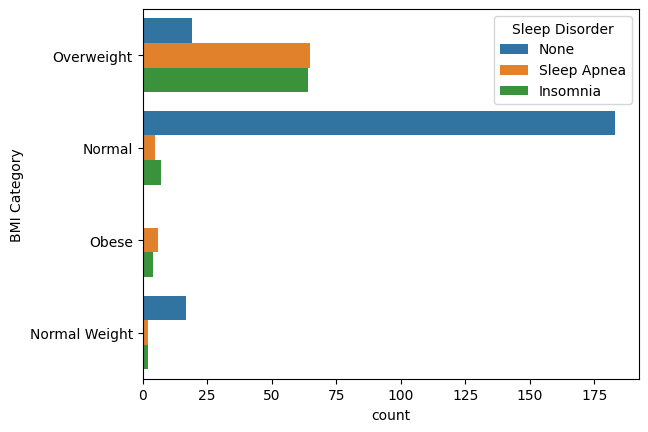

In [18]:
sns.countplot(hue="Sleep Disorder", y="BMI Category", data= sleep_data)
plt.show()

#### Gender

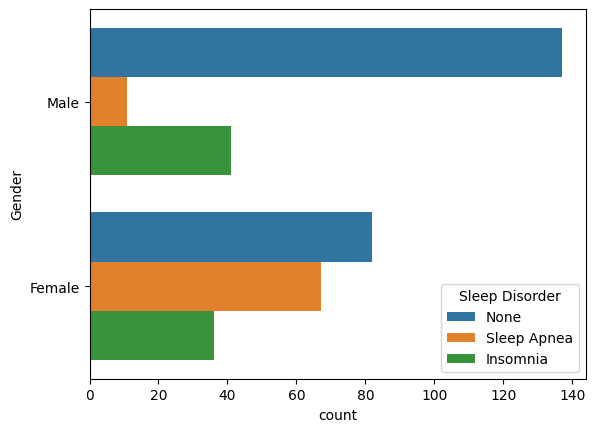

In [19]:
sns.countplot(hue="Sleep Disorder", y="Gender", data= sleep_data)
plt.show()

#### Occupation

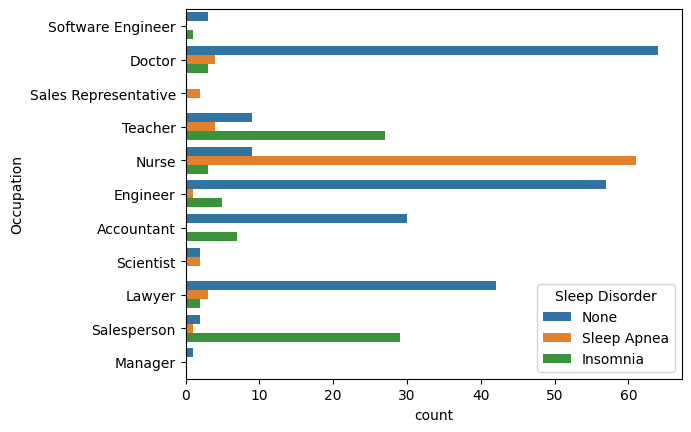

In [20]:
sns.countplot(hue="Sleep Disorder", y="Occupation", data= sleep_data)
plt.show()

### What variables explain better sleep disorder?

Age,Sleep duration, BMI, Occupation and perhaps "Physical activity level"

Text(0, 0.5, 'quality of sleep')

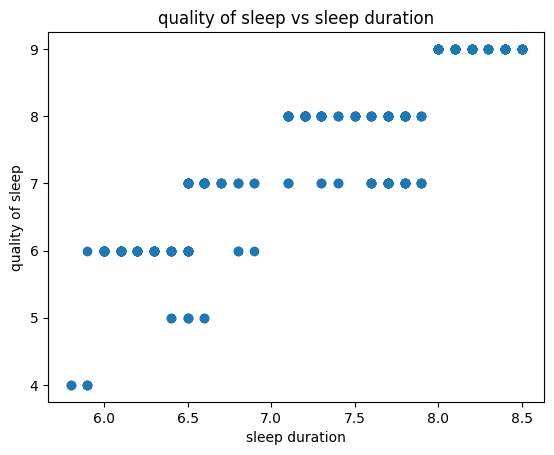

In [22]:
plt.scatter(sleep_data["Sleep Duration"], sleep_data["Quality of Sleep"])
plt.title("quality of sleep vs sleep duration")
plt.xlabel("sleep duration")
plt.ylabel("quality of sleep")

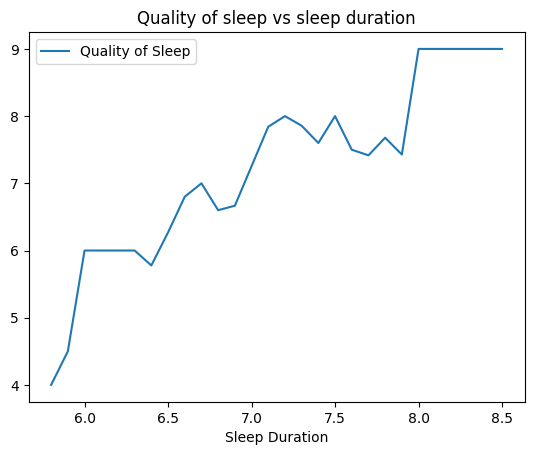

In [24]:
DAT=sleep_data[['Sleep Duration','Quality of Sleep']].groupby('Sleep Duration').mean()
DAT.plot()
plt.title('Quality of sleep vs sleep duration')
plt.show()

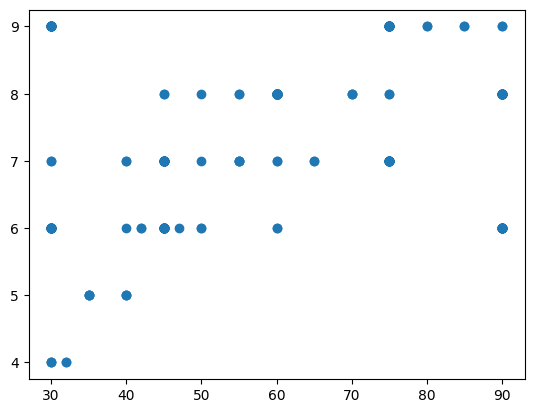

In [25]:
plt.scatter(sleep_data["Physical Activity Level"], sleep_data["Quality of Sleep"])

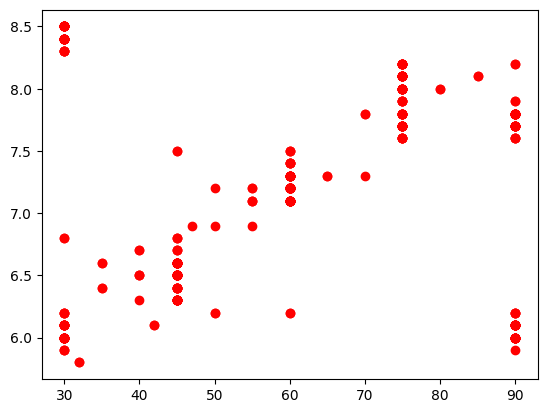

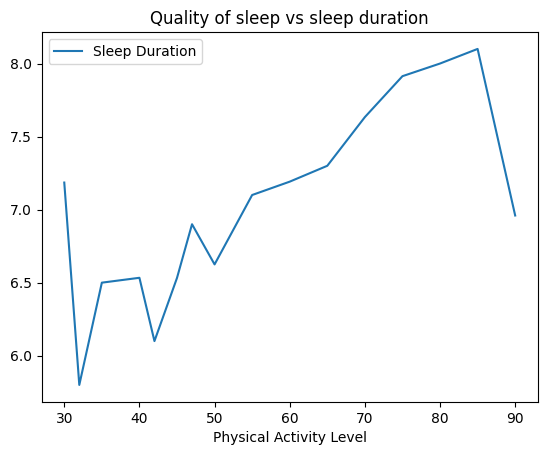

In [31]:
plt.scatter(sleep_data["Physical Activity Level"], sleep_data["Sleep Duration"],color='red')
DAT=sleep_data[['Physical Activity Level','Sleep Duration']].groupby('Physical Activity Level').mean()
DAT.plot()
plt.title('Quality of sleep vs sleep duration')
plt.show()